In [734]:
# Hinweise zum Einlesen
import keras
import matplotlib.pyplot as plt
plt.style.use('default')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

train_val = pd.read_csv('titanic_data/train.csv')
test_data = pd.read_csv('titanic_data/test.csv')

In [735]:
length = int(len(train_val) * 0.8)
train_dataset = train_val[:length]
validation_dataset = train_val[length:]

train_dataset.head(5)
pd.crosstab(train_dataset['Pclass'], train_dataset['Survived'])

Survived,0,1
Pclass,,
1,68,107
2,75,72
3,291,99


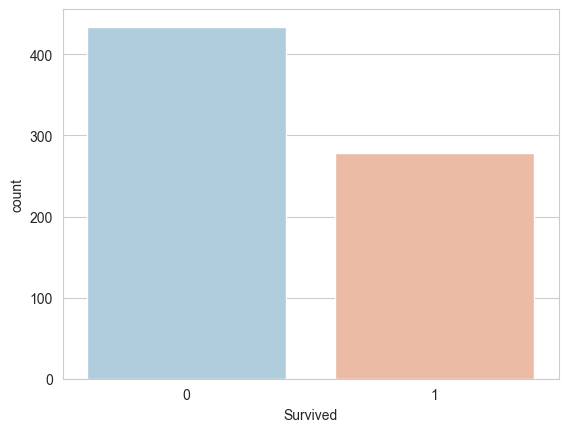

In [736]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train_dataset,palette='RdBu_r');

In [737]:
print('\n--------Trainings DataSet 80%---------\n')
survived_value_counts = train_dataset.groupby('Pclass').Survived.value_counts()
survived_percentage = train_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

print()
print(survived_value_counts)
print()
print(survived_percentage)
print()
print('accuracy Train Data: ', sum(survived_value_counts.to_list()[::2])/ sum(survived_value_counts.to_list()))


--------Trainings DataSet 80%---------


Pclass  Survived
1       1           107
        0            68
2       0            75
        1            72
3       0           291
        1            99
Name: Survived, dtype: int64

   Pclass  Survived
0       1  0.611429
1       2  0.489796
2       3  0.253846

accuracy Train Data:  0.6643258426966292


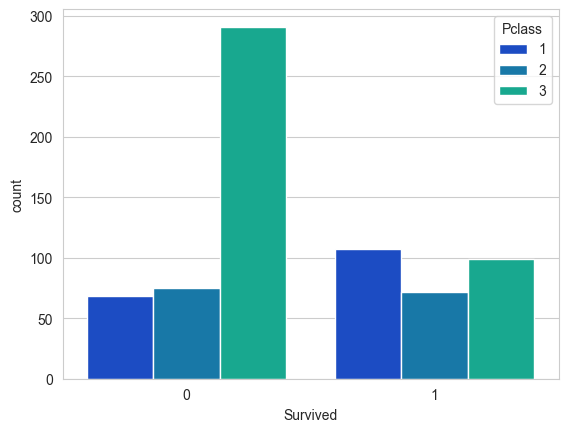

In [738]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train_dataset,palette='winter');


In [739]:
val_survived_value_counts = validation_dataset.groupby('Pclass').Survived.value_counts()
val_survived_percentage = validation_dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

print('\n--------Validation DataSet 20%---------\n')
print(val_survived_value_counts)
print()
print(val_survived_percentage)
print()
print('accuracy Validation Data: ', sum(val_survived_value_counts.to_list()[::2])/ sum(val_survived_value_counts.to_list()))


--------Validation DataSet 20%---------

Pclass  Survived
1       1           29
        0           12
2       0           22
        1           15
3       0           81
        1           20
Name: Survived, dtype: int64

   Pclass  Survived
0       1  0.707317
1       2  0.405405
2       3  0.198020

accuracy Validation Data:  0.7374301675977654


In [740]:
print('\n---survived male female---\n')

print(pd.pivot_table(train_dataset, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
women = train_dataset.loc[train_dataset.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print()
print("% of women who survived:", rate_women)
men = train_dataset.loc[train_dataset.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print()
print("% of men who survived:", rate_men)


---survived male female---

Sex       female  male
Survived              
0             66   368
1            190    88


% of women who survived: 0.7421875

% of men who survived: 0.19298245614035087


<AxesSubplot:xlabel='Survived', ylabel='count'>

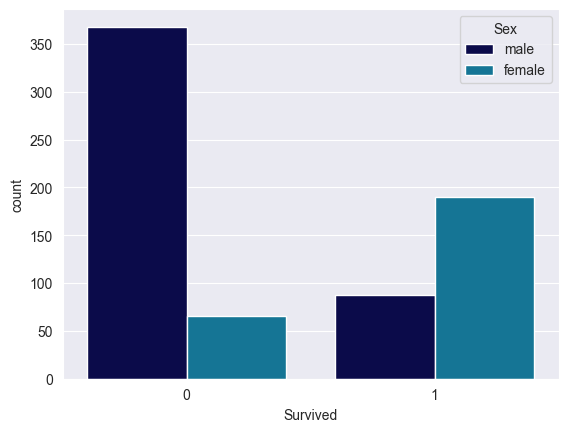

In [741]:
sns.set_style('darkgrid')
sns.countplot(x='Survived',hue='Sex',data=train_dataset,palette='ocean')

c:\users\akkarin\documents\06_semester\ai\aufgabe_4_ml\venv\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

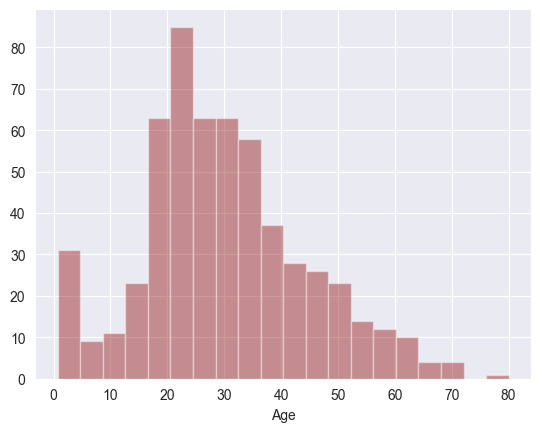

In [742]:
sns.distplot(train_dataset['Age'].dropna(),kde=False,color='darkred',bins=20)

In [743]:
validation_dataset["Age"].fillna(train_dataset["Age"].median(skipna=True), inplace=True)
train_dataset["Age"].fillna(train_dataset["Age"].median(skipna=True), inplace=True)

train_dataset.isnull().sum()

c:\users\akkarin\documents\06_semester\ai\aufgabe_4_ml\venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
c:\users\akkarin\documents\06_semester\ai\aufgabe_4_ml\venv\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          550
Embarked         1
dtype: int64

In [744]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

y = train_dataset["Survived"]

features = ["Pclass", "Sex", "Age"]
X = pd.get_dummies(train_dataset[features])
X_test = pd.get_dummies(train_dataset[features])
print(X_test)
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
# model = LogisticRegression()

model.fit(X, y)
predictions = model.predict(X_test)

     Pclass   Age  Sex_female  Sex_male
0         3  22.0           0         1
1         1  38.0           1         0
2         3  26.0           1         0
3         1  35.0           1         0
4         3  35.0           0         1
..      ...   ...         ...       ...
707       1  42.0           0         1
708       1  22.0           1         0
709       3  28.0           0         1
710       1  24.0           1         0
711       1  28.0           0         1

[712 rows x 4 columns]


In [745]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

print(classification_report(y,predictions))

print('accuracy logistische Regression', accuracy_score(y,predictions)*100)


              precision    recall  f1-score   support

           0       0.84      0.93      0.88       434
           1       0.86      0.72      0.78       278

    accuracy                           0.84       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.84      0.84       712

accuracy logistische Regression 84.41011235955057


In [746]:
output = pd.DataFrame({'PassengerId': train_dataset.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")



Your submission was successfully saved!


In [747]:
#Sie können von folgendem Code starten um das Netzwerk zu definieren, füllen Sie die ...
from keras import Sequential
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()

model.add(Dense(10, activation='sigmoid', batch_input_shape=(None, 4))) #We have 4 input features

model.add(Dense(1, activation='sigmoid'))

opt = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=opt,
              metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 10)                50        
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 11        
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [748]:
features = ["Pclass", "Sex", "Age"]
X_val = pd.get_dummies(validation_dataset[features])
Y_val = validation_dataset["Survived"]

Epoch 1/50
178/178 - 1s - loss: 0.7916 - accuracy: 0.4691 - val_loss: 0.6390 - val_accuracy: 0.6425
Epoch 2/50
178/178 - 0s - loss: 0.6385 - accuracy: 0.6166 - val_loss: 0.6029 - val_accuracy: 0.6536
Epoch 3/50
178/178 - 0s - loss: 0.6165 - accuracy: 0.6517 - val_loss: 0.5847 - val_accuracy: 0.7263
Epoch 4/50
178/178 - 0s - loss: 0.6035 - accuracy: 0.6770 - val_loss: 0.5690 - val_accuracy: 0.7654
Epoch 5/50
178/178 - 0s - loss: 0.5896 - accuracy: 0.7079 - val_loss: 0.5544 - val_accuracy: 0.7709
Epoch 6/50
178/178 - 0s - loss: 0.5762 - accuracy: 0.7486 - val_loss: 0.5398 - val_accuracy: 0.7765
Epoch 7/50
178/178 - 0s - loss: 0.5661 - accuracy: 0.7640 - val_loss: 0.5302 - val_accuracy: 0.8045
Epoch 8/50
178/178 - 0s - loss: 0.5566 - accuracy: 0.7654 - val_loss: 0.5163 - val_accuracy: 0.7989
Epoch 9/50
178/178 - 0s - loss: 0.5456 - accuracy: 0.7711 - val_loss: 0.5049 - val_accuracy: 0.7989
Epoch 10/50
178/178 - 0s - loss: 0.5345 - accuracy: 0.7949 - val_loss: 0.5049 - val_accuracy: 0.7933

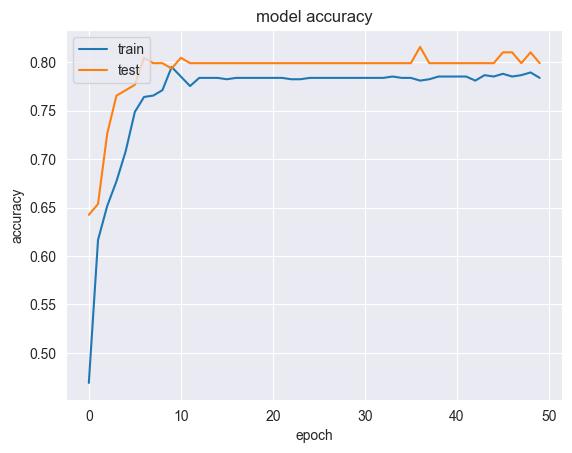

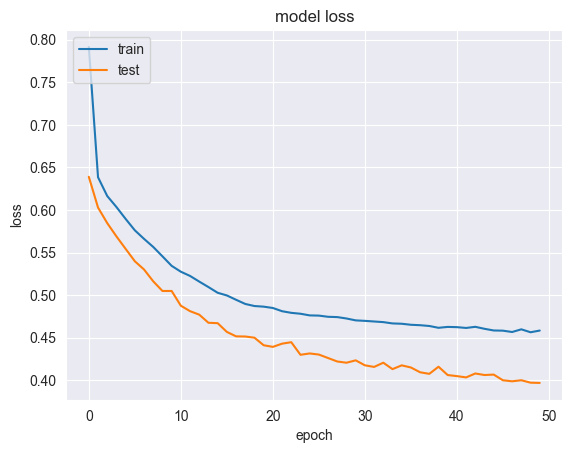

In [749]:
history= model.fit(X,y, batch_size=4, epochs=50, verbose=2, validation_data=(X_val,Y_val))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


